In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# datos

In [24]:
#todo el año
Ens = pd.read_csv('ensenada.csv', header=None,skiprows= 1 )
Ens.columns = ['Fecha', 'Dia', 'Hora', 'Prediccion ft', 'Prediccion m', 'High/Low']
Ens["Fecha"] = Ens["Fecha"].map(str) +" "+ Ens["Hora"]
Ens["Prediccion m"]= Ens["Prediccion m"] /100
Ens['Fecha'] = pd.to_datetime(Ens['Fecha'])
Ens.head()

,Fecha,Dia,Hora,Prediccion ft,Prediccion m,High/Low
0,2018-01-01 01:24:00,Mon,01:24,1.32,0.40,L
1,2018-01-01 07:33:00,Mon,07:33,6.89,2.10,H
2,2018-01-01 14:47:00,Mon,14:47,-1.67,-0.51,L
3,2018-01-01 21:04:00,Mon,21:04,4.16,1.27,H
4,2018-02-01 02:12:00,Tue,02:12,1.34,0.41,L


In [25]:
Ens.dtypes


Fecha            datetime64[ns]
Dia                      object
Hora                     object
Prediccion ft           float64
Prediccion m            float64
High/Low                 object
dtype: object

In [26]:
print(Ens)

                   Fecha  Dia   Hora  Prediccion ft  Prediccion m High/Low
0    2018-01-01 01:24:00  Mon  01:24           1.32          0.40        L
1    2018-01-01 07:33:00  Mon  07:33           6.89          2.10        H
2    2018-01-01 14:47:00  Mon  14:47          -1.67         -0.51        L
3    2018-01-01 21:04:00  Mon  21:04           4.16          1.27        H
4    2018-02-01 02:12:00  Tue  02:12           1.34          0.41        L
5    2018-02-01 08:18:00  Tue  08:18           6.93          2.11        H
6    2018-02-01 15:33:00  Tue  15:33          -1.74         -0.53        L
7    2018-02-01 21:52:00  Tue  21:52           4.22          1.29        H
8    2018-03-01 03:01:00  Wed  03:01           1.40          0.43        L
9    2018-03-01 09:05:00  Wed  09:05           6.73          2.05        H
10   2018-03-01 16:19:00  Wed  16:19          -1.58         -0.48        L
11   2018-03-01 22:41:00  Wed  22:41           4.23          1.29        H
12   2018-04-01 03:53:00 

In [31]:
#datos de un dia
Ensday= Ens[(Ens['Fecha'] <= '2018-12-31 23:01:00') &  (Ens['Fecha'] >= '2018-12-30 22:09:00')]
Ensday.head()

,Fecha,Dia,Hora,Prediccion ft,Prediccion m,High/Low
1406,2018-12-30 22:09:00,Sun,22:09,1.05,0.32,L
1407,2018-12-31 04:47:00,Mon,04:47,5.28,1.61,H
1408,2018-12-31 11:51:00,Mon,11:51,0.51,0.16,L
1409,2018-12-31 17:37:00,Mon,17:37,3.39,1.03,H
1410,2018-12-31 23:01:00,Mon,23:01,1.30,0.40,L


In [32]:
print(Ensday)

                   Fecha  Dia   Hora  Prediccion ft  Prediccion m High/Low
1406 2018-12-30 22:09:00  Sun  22:09           1.05          0.32        L
1407 2018-12-31 04:47:00  Mon  04:47           5.28          1.61        H
1408 2018-12-31 11:51:00  Mon  11:51           0.51          0.16        L
1409 2018-12-31 17:37:00  Mon  17:37           3.39          1.03        H
1410 2018-12-31 23:01:00  Mon  23:01           1.30          0.40        L


# graficas

In [16]:
# año offline grafica
import plotly
import plotly.graph_objs as go

import plotly.offline as offline
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)



trace1 = go.Scatter(
    x=Ens['Fecha'],
    y=Ens['Prediccion m'],
    name='estacion',
)

data = [trace1]
layout = go.Layout(
    title=' niveles de mar del sensor junto a la estación y el del canal de un dia',
    yaxis=dict(
        title='nivel del mar en la estacion'
    ),
    yaxis2=dict(
        title='nivel del mar en el canal',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)

fig = go.Figure(data=data, layout=layout)
plot_url = offline.iplot(fig, filename='multiple-axes-double')


In [ ]:
#grafica de dia offline
#ejemplo completo
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector


ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)+0.5*np.sin(2*np.pi*8*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plot_url = py.plot_mpl(fig, filename='mpl-basic-fft')


In [18]:
#ejemplo completo
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector


ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)+0.5*np.sin(2*np.pi*8*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plot_url = py.plot_mpl(fig, filename='mpl-basic-fft')

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure

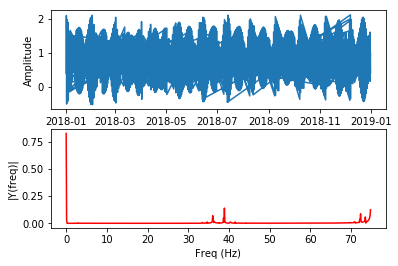

In [17]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
plotly.offline.init_notebook_mode(connected=True)


# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.array(Ens['Fecha'])# time vector


ff = 5;   # frequency of the signal
y = Ens['Prediccion m']
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plot_url = offline.iplot(fig, filename='mpl-basic-fft')